<a href="https://colab.research.google.com/github/rafaeldjsm/Matematica/blob/main/Seg_lin_proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trata-se de determinar:

#Qual o comprimento média dos seguimentos de linhas criados aleatoriamente em um quadrado de lado igual a 1.

O princípal "pulo do gato" é utilizar a propriedade de que distribuição uniforme e a propriedade em que a soma/diferença de duas variáveis que seguem uma distribuição uniforme, gera uma variável que segue uma distribuição triangular:

Antes de tudo, vamos testar de forma numérica o resultado esperado:<br>
Na primeira a solução numérica e abaixo a solução analítica:

In [ ]:
import numpy as np
n=100000

x0=np.random.random(n)
y0=np.random.random(n)
x1=np.random.random(n)
y1=np.random.random(n)

Sol_Num=np.mean([np.sqrt((x0-x1)**2+(y0-y1)**2)][0]) #Solução Numérica
Sol_Analitica=(2+np.sqrt(2)+5*np.log(np.sqrt(2)+1))/15 #Solução Analítica

Sol_Num,Sol_Analitica

(0.5217411197895963, 0.5214054331647207)

Esse problema é uma caso particular da Constante de Robbins (http://www.scientificlib.com/en/Mathematics/LX/RobbinsConstant.html)

A primeira parte da solução começa por: 

$$
I=\int_0^1 \int_0^1 \int_0^1 \int_0^1\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}\,d\mu\\ 
$$

Esta integral é bem complicada, como mostrado abaixo:

In [ ]:
import sympy
from sympy import *
from sympy import symbols

x,y,z,w=symbols('x y z w')

integrate(((x-y)**2+(w-z)**2)**(1/2), (x, 0, 1),(y, 0, 1),(z, 0, 1),(w, 0, 1))

    1                                                                         
    ⌠                                                                         
    ⎮     1                                                                   
    ⎮     ⌠                                                                   
    ⎮     ⎮                      1                                            
    ⎮     ⎮                      ⌠                                            
    ⎮     ⎮                      ⎮         ⎛          │       2  ⅈ⋅π      ⎞   
    ⎮     ⎮           2.0        ⎮     ┌─  ⎜-0.5, 1/2 │      y ⋅ℯ         ⎟   
    ⎮     ⎮ polar_lift   (w - z)⋅⎮ -y⋅ ├─  ⎜          │ ──────────────────⎟ dy
    ⎮     ⎮                      ⎮    2╵ 1 ⎜   3/2    │           2       ⎟   
    ⎮     ⎮                      ⎮         ⎝          │ polar_lift (w - z)⎠   
    ⎮     ⎮                      ⌡                                            
    ⎮     ⎮                      0                  

Como essa integral é obviamente bem complicada de fazer, utilizamos as propriedades estatísticas abaixo:

"A variável aleatória gerada pela diferença de duas variáveis aleatórias uniformemente distribuídas apresenta distribuição de probabilidade triangular:"

Segue abaixo um exemplo mostrando esta propriedade:

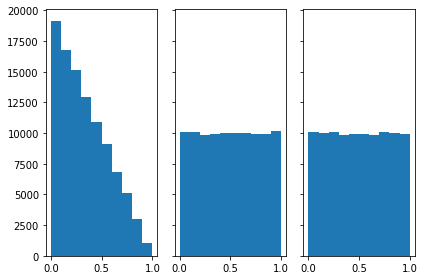

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(abs(x0-y0));
axs[1].hist(x0);
axs[2].hist(y0);

Como x1,x2 são uniformemente distribuídas (Assim como y1 e y2) a função distribuição de probabilidade da diferença será de:
$$
f_{\Delta X}(x) = \left(1-|x|\right)\cdot{1}_{[-1,1]}(x) $$

$$
f_{\Delta Y}(y) = \left(1-|y|\right)\cdot{1}_{[-1,1]}(y)
$$

A pripiedade 

O que geraria a seguinte integral mais "tragável" que a primeira:

$$\int_{-1}^1 \int_{-1}^1(1-|x|)(1-|y|)\sqrt{x^2+y^2}\,dx\,dy $$


Como observado no gráfico abaixo, esta função é simétrica em relação a origem :

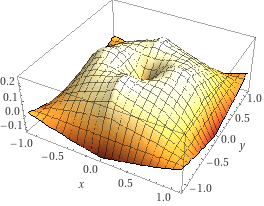

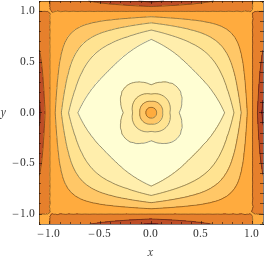

Logo, podemos substituir a integral da seguinte forma, considerando apenas o primeiro quadrante com x e y positivo :

$$
4\int_{0}^1 \int_{0}^1 (1-x)(1-y)\sqrt{x^2+y^2}\,dx\,dy
$$

Agora fazendo a mudança de variável para a forma polar e lambrando do Jacobiano desta mudança : 
$$ u = r cos\theta $$

$$v = r sin \theta $$

$$dudv=r dr d\theta $$


Já que a função também é simétrica em relação a bissetriz do primeiro quadrante (y=x) podemos fazer a integração até esta reta e multiplicar a integral por 2 (Como já era multiplicado por 4, agora será por 8):


Desta forma:

θ varia de 0 a $\frac{\pi}{4}$

r varia de 0 a $\frac1{cos\theta}$


Agora a parte mais complicada que é conhecida integral de $sec^3$: <br> 
$$8\int_{0}^\frac{\pi}{4} \int_{0}^{\frac{1}{cos \theta}} \sqrt{r^2{cos \theta}^2+r^2{sen \theta}^2}(1-r{cos \theta})(1-{sen \theta})rdr\,d\theta = $$

$$ 8\int_{0}^\frac{\pi}{4} \int_{0}^{\frac{1}{cos \theta}} r(1-r{cos \theta})(1-{sen \theta})dr\,d\theta= $$

$$
8\int_{0}^\frac{\pi}{4} \int_{0}^{\frac{1}{cos \theta}} (r^{4} \sin{\left(\theta \right)} \cos{\left(\theta \right)} - r^{3} \sin{\left(\theta \right)} - r^{3} \cos{\left(\theta \right)} + r^{2})dr\,d\theta= 
8\int_{0}^\frac{\pi}{4}\frac{r^3}3 - \frac{(r^4 cos\theta)}{4} - \frac{(r^4 sen\theta)}{4} + \frac{(r^5 cos\theta sen\theta)}{5}d\theta=$$

$$8\int_{0}^\frac{\pi}{4}\frac{-1}{60}\cdot sec^3(\theta) (3 tan(\theta)-5)d\theta$$


$$8 \int_0^{\frac{\pi}{4}} \frac{sec^3\theta}{12}-\frac{sec^3\theta tan\theta}{20}d\theta= 8 (\frac{sec\theta tan\theta+ln(sec \theta+tan \theta)}{24}-\frac{sec^3\theta }{60})\Big|_0^{\frac{\pi}{4}}=\\ \frac{2+\sqrt2+5\cdot ln(\sqrt2+1)}{15}\approx 0,521405433$$

In [ ]:
r, theta= symbols("r theta")
8*integrate(((sec(theta)**3)/12)-((sec(theta)**3)*tan(theta)/20),(theta, 0, np.pi/4))

0.521405433164721